In [ ]:
import json
import pandas as pd

with open("cf_experiments_results.json", "r") as f:
    data = json.load(f)

df = pd.json_normalize(data)

df["value"] = df["value"].apply(lambda v: json.dumps(v) if isinstance(v, (list, tuple)) else str(v))

pd.set_option("display.max_rows", None, "display.max_columns", None)

print("=== Full Results ===")
display(df)

df_valid = df[df["no_cfs"] == False]
summary = (
    df_valid
    .groupby(["data_seed", "param", "value"])
    [["proximity_mean", "sparsity_mean"]]
    .mean()
    .round(4)
    .reset_index()
)
print("\n=== Summary of Mean Proximity & Sparsity ===")
display(summary)

repro = (
    df_valid
    .groupby(["data_seed", "param", "value"])["fingerprint"]
    .nunique()
    .reset_index(name="unique_hashes")
)
repro["reproducible"] = repro["unique_hashes"] == 1
print("\n=== Reproducibility Table ===")
display(repro)

=== Full Results ===


,data_seed,param,value,rep,fingerprint,proximity_mean,sparsity_mean,no_cfs,changes.age,changes.workclass,changes.fnlwgt,changes.education,changes.education-num,changes.marital-status,changes.occupation,changes.relationship,changes.race,changes.sex,changes.capital-gain,changes.capital-loss,changes.hours-per-week,changes.native-country,im1_mean,im2_mean
0,42,baseline,None,1,174c64e333169a45eba7ef50d989c309,46371.733560,1.638,False,62,31,37,21,47,45,34,36,29,13,328,68,35,33,NaN,NaN
1,42,baseline,None,2,acb921f5794114518e55b1a9d088a200,62014.183037,1.658,False,55,28,44,41,45,37,32,32,22,13,338,73,36,33,NaN,NaN
2,42,baseline,None,3,c4a323a60465bac70437aab642504ab9,51174.930041,1.608,False,49,19,43,25,46,31,29,31,29,21,332,67,42,40,NaN,NaN
3,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",1,bb1cd3502375fba9ce157403393f69ee,48420.046816,1.596,False,42,17,35,27,52,36,32,40,21,20,333,78,39,26,0.922148,0.125645
4,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",2,905d74ee7ca4c98866bdcb67f0bcc2f8,59579.134714,1.644,False,42,31,48,25,42,36,41,43,21,14,345,60,41,33,0.901946,0.107358
5,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",3,b5e2adc8c6a652d4071d643a4c413a10,51787.937020,1.674,False,47,39,37,36,48,42,34,41,20,12,333,73,40,35,0.906348,0.112263
6,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",1,38b8805eeca2cae096f9220e6e40fd2d,44742.753566,1.588,False,58,32,36,48,54,0,37,45,0,0,334,91,59,0,0.889354,0.096813
7,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",2,671898bc8ec877c16cbb94245d5f261b,53886.872325,1.634,False,68,35,39,33,66,0,46,47,0,0,332,87,64,0,0.903056,0.119583
8,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",3,70addc0eb3fe022cc8afb53fa3cc07e3,71609.878852,1.664,False,61,41,67,37,58,0,46,55,0,0,332,75,60,0,0.923184,0.098123



=== Summary of Mean Proximity & Sparsity ===


,data_seed,param,value,proximity_mean,sparsity_mean
0,42,baseline,None,53186.9489,1.6347
1,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",53262.3728,1.6380
2,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",56746.5016,1.6287



=== Reproducibility Table ===


,data_seed,param,value,unique_hashes,reproducible
0,42,baseline,None,3,False
1,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",3,False
2,42,features_to_vary,"[""age"", ""workclass"", ""fnlwgt"", ""education"", ""e...",3,False


In [ ]:
df = pd.read_csv("results/dice_cherry_vs_not/metrics.csv")[cols]
df['cherry'] = df['label'].apply(lambda x: 1 if 'cherry' in str(x) else 0)

def get_type(row):
    model_s = row['model_seed']
    cf_s = row['cf_seed']
    
    if model_s == 42 and cf_s == 42:
        return "baseline"
    elif model_s != 42 and cf_s == 42:
        return "model seed"
    elif model_s == 42 and cf_s != 42:
        return "cf seed"
    else:
        return "OTHER"

df['type'] = df.apply(get_type, axis=1)

type_map = {"baseline": 1, "model seed": 2, "cf seed": 3, "OTHER": 4}
df['type_num'] = df['type'].map(type_map)

cols_to_keep = ['type_num', 'sparsity_mean']

df_std = df[df['cherry'] == 0][cols_to_keep]
df_std.to_csv("results/dice_cherry_vs_not/data_std.csv", index=False)

df_chry = df[df['cherry'] == 1][cols_to_keep]
df_chry.to_csv("results/dice_cherry_vs_not/data_chry.csv", index=False)

print("Files saved successfully.")
print(f"Standard shape: {df_std.shape}")
print(f"Cherry shape: {df_chry.shape}")

Files saved successfully.
Standard shape: (100, 2)
Cherry shape: (100, 2)


In [ ]:
df = pd.read_csv("results/dice_cherry_vs_not/metrics.csv")
df['cherry'] = df['label'].apply(lambda x: 1 if 'cherry' in str(x) else 0)

def get_type(row):
    model_s = row['model_seed']
    cf_s = row['cf_seed']

    if model_s == 42 and cf_s == 42:
        return "baseline"
    elif model_s != 42 and cf_s == 42:
        return "model seed"
    elif model_s == 42 and cf_s != 42:
        return "cf seed"
    else:
        return "OTHER"
    

df['type'] = df.apply(get_type, axis=1)

type_map = {"baseline": 1, "model seed": 2, "cf seed": 3, "OTHER": 4}
df['type_num'] = df['type'].map(type_map)

cols_to_keep = ['type_num', 'sparsity_mean']

df_std = df[df['cherry'] == 0][cols_to_keep]
df_std.to_csv("results/dice_cherry_vs_not/data_std.csv", index=False)

df_chry = df[df['cherry'] == 1][cols_to_keep]
df_chry.to_csv("results/dice_cherry_vs_not/data_chry.csv", index=False)

def get_boxplot_stats(group_df):
    stats = group_df.groupby('type_num')['sparsity_mean'].agg(
        lower_whisker=lambda x: x.quantile(0.05),
        lower_quartile=lambda x: x.quantile(0.25),
        median='median',
        upper_quartile=lambda x: x.quantile(0.75),
        upper_whisker=lambda x: x.quantile(0.95)
    ).reset_index()
    return stats

df_std = df[df['cherry'] == 0]
df_chry = df[df['cherry'] == 1]

stats_std = get_boxplot_stats(df_std)
stats_chry = get_boxplot_stats(df_chry)

stats_std.to_csv("results/dice_cherry_vs_not/stats_std.csv", index=False)
stats_chry.to_csv("results/dice_cherry_vs_not/stats_chry.csv", index=False)

cols = ['type_num', 'sparsity_mean']
df_std[cols].dropna().to_csv("results/dice_cherry_vs_not/points_std.csv", index=False)
df_chry[cols].dropna().to_csv("results/dice_cherry_vs_not/points_chry.csv", index=False)

print("Files generated successfully.")

Files generated successfully.


Vibe coded seaborn prototype for Figure 3 (the box and whisker plot in Results)

/tmp/ipykernel_9775/2276124484.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=df, x='type', y='sparsity_mean', hue='Feature Set',


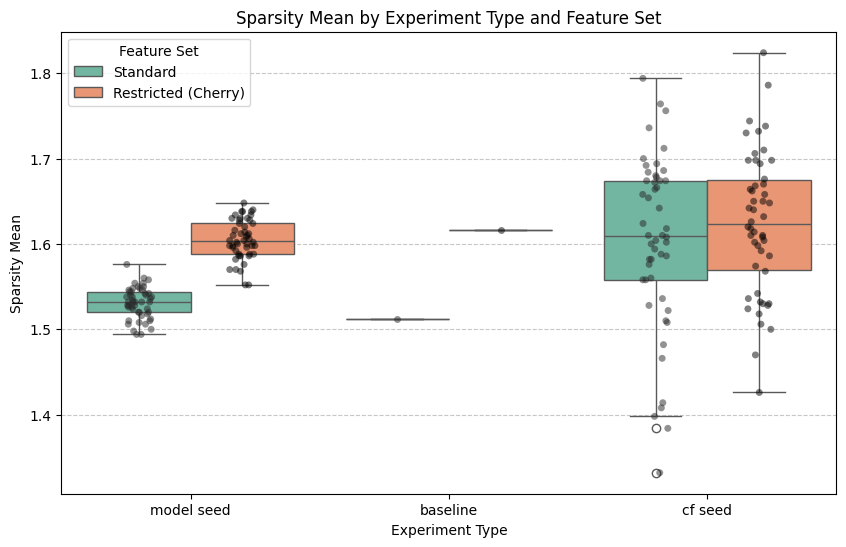

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a more descriptive column for the legend
df['Feature Set'] = df['cherry'].map({1: 'Restricted (Cherry)', 0: 'Standard'})

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='sparsity_mean', hue='Feature Set', palette="Set2")

# Optional: Add points on top to see individual data distribution
sns.stripplot(data=df, x='type', y='sparsity_mean', hue='Feature Set', 
              dodge=True, color='black', alpha=0.5, legend=False)

plt.title('Sparsity Mean by Experiment Type and Feature Set')
plt.ylabel('Sparsity Mean')
plt.xlabel('Experiment Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Feature Set')

plt.show()

In [ ]:
type_map = {"baseline": 1, "model seed": 2, "cf seed": 3, "OTHER": 4}
df['type_num'] = df['type'].map(type_map)

df_latex = df[['type_num', 'cherry', 'sparsity_mean']].copy()
df_latex.to_csv("results/dice_cherry_vs_not/latex_data.csv", index=False)

In [ ]:
type_map = {"baseline": 1, "model seed": 2, "cf seed": 3, "OTHER": 4}
df['type_num'] = df['type'].map(type_map)

df_std = df[df['cherry'] == 0][['type_num', 'sparsity_mean']]
df_std.to_csv("results/dice_cherry_vs_not/data_std.csv", index=False)

df_chry = df[df['cherry'] == 1][['type_num', 'sparsity_mean']]
df_chry.to_csv("results/dice_cherry_vs_not/data_chry.csv", index=False)

In [ ]:
cherry_df = df[df['cherry'] == 1]
other_df = df[df['cherry'] == 0]

merged_df = pd.merge(
    cherry_df, 
    other_df, 
    on=['model_seed', 'cf_seed'], 
    suffixes=('_cherry', '_other')
)

better_cherry_df = merged_df[merged_df['sparsity_mean_cherry'] < merged_df['sparsity_mean_other']]

type_counts = better_cherry_df['type_cherry'].value_counts()

print("Counts by type where cherry picked had lower sparsity:")
print(type_counts)

Counts by type where cherry picked had lower sparsity:
type_cherry
cf seed    25
Name: count, dtype: int64


In [ ]:
cherry_df = df[df['cherry'] == 1]
other_df = df[df['cherry'] == 0]

merged_df = pd.merge(
    cherry_df, 
    other_df, 
    on=['model_seed', 'cf_seed'], 
    suffixes=('_cherry', '_other')
)

total_pairs = len(merged_df)

better_cherry_df = merged_df[merged_df['sparsity_mean_cherry'] < merged_df['sparsity_mean_other']]
better_count = len(better_cherry_df)

print(f"Total matching pairs found: {total_pairs}")
print(f"Cherry rows with lower sparsity: {better_count}")

Total matching pairs found: 100
Cherry rows with lower sparsity: 25


In [39]:
len(set(df.cf_seed.unique()) - set(df.model_seed.unique()))

24

In [ ]:
counts = df.groupby(['model_seed', 'cf_seed', 'cherry']).size().unstack(fill_value=0)

counts.columns = ['count_other', 'count_cherry']

counts['resulting_pairs'] = counts['count_other'] * counts['count_cherry']

print(counts.head(10))

print(f"\nTotal Pairs: {counts['resulting_pairs'].sum()}")

                    count_other  count_cherry  resulting_pairs
model_seed cf_seed                                            
0          42                 1             1                1
4          42                 1             1                1
5          42                 1             1                1
8          42                 1             1                1
10         42                 1             1                1
13         42                 1             1                1
14         42                 1             1                1
19         42                 1             1                1
20         42                 1             1                1
22         42                 1             1                1

Total Pairs: 100


In [ ]:
import os

input_path = "results/dice_cherry_vs_not/metrics.csv"
output_dir = "results/dice_cherry_vs_not/"

os.makedirs(output_dir, exist_ok=True)

cols = ['label', 'model_seed', 'cf_seed', 'sparsity_mean'] 
df = pd.read_csv(input_path, usecols=cols)

df['cherry'] = df['label'].apply(lambda x: 1 if 'cherry' in str(x) else 0)

def get_type(row):
    model_s = row['model_seed']
    cf_s = row['cf_seed']
    
    if model_s == 42 and cf_s == 42:
        return "baseline"
    elif model_s != 42 and cf_s == 42:
        return "model seed"
    elif model_s == 42 and cf_s != 42:
        return "cf seed"
    else:
        return "OTHER"

df['type'] = df.apply(get_type, axis=1)

type_map = {"baseline": 1, "model seed": 2, "cf seed": 3, "OTHER": 4}
df['type_num'] = df['type'].map(type_map)

def calculate_boxplot_data(subset_df):
    """
    Calculates min, q1, median, q3, max for each type_num (1, 2, 3, 4).
    Returns a DataFrame strictly ordered by type_num.
    """
    stats_list = []
    
    for t in [1, 2, 3, 4]:
        data = subset_df[subset_df['type_num'] == t]['sparsity_mean']
        
        if len(data) > 0:
            stats = {
                'type_num': t,
                'lower_whisker': data.quantile(0.05),
                'lower_quartile': data.quantile(0.25),
                'median': data.median(),
                'upper_quartile': data.quantile(0.75),
                'upper_whisker': data.quantile(0.95)
            }
        else:
            stats = {k: 0 for k in ['type_num','lower_whisker','lower_quartile','median','upper_quartile','upper_whisker']}
            stats['type_num'] = t
            
        stats_list.append(stats)
        
    return pd.DataFrame(stats_list)

df_std = df[df['cherry'] == 0]
df_chry = df[df['cherry'] == 1]

stats_std_df = calculate_boxplot_data(df_std)
stats_chry_df = calculate_boxplot_data(df_chry)

stats_std_df.to_csv(os.path.join(output_dir, "stats_std.csv"), index=False)
stats_chry_df.to_csv(os.path.join(output_dir, "stats_chry.csv"), index=False)

cols_keep = ['type_num', 'sparsity_mean']
df_std[cols_keep].dropna().to_csv(os.path.join(output_dir, "points_std.csv"), index=False)
df_chry[cols_keep].dropna().to_csv(os.path.join(output_dir, "points_chry.csv"), index=False)

print("SUCCESS: 4 clean files generated in results/dice_cherry_vs_not/")
print(stats_std_df)

SUCCESS: 4 clean files generated in results/dice_cherry_vs_not/
   type_num  lower_whisker  lower_quartile  median  upper_quartile  \
0         1         1.5120           1.512   1.512           1.512   
1         2         1.4988           1.520   1.532           1.544   
2         3         1.4025           1.558   1.609           1.674   
3         4         0.0000           0.000   0.000           0.000   

   upper_whisker  
0         1.5120  
1         1.5564  
2         1.7470  
3         0.0000  


In [2]:
metric_cols = ['label', 'model_seed', 'cf_seed', "proximity_mean", "im1_mean"]

metrics_df = pd.read_csv("results/dice_cherry_vs_not/metrics.csv")[metric_cols]
metrics_df["feature_set"] = metrics_df['label'].apply(lambda x: 'Restricted' if 'cherry' in str(x) else 'All')

def seed_int(row):
    if row["model_seed"] != 42:
        return 1
    elif row["cf_seed"] != 42:
        return 2
    else:
        return 3

metrics_df["type"] = metrics_df.apply(seed_int, axis=1)
metrics_df

,label,model_seed,cf_seed,proximity_mean,im1_mean,feature_set,type
0,random_model_run_1,13,42,1.432378,0.897026,All,1
1,random_model_run_2,42,42,1.389254,0.910960,All,3
2,random_model_run_3,49,42,1.359674,0.904695,All,1
3,random_model_run_4,61,42,1.433704,0.902226,All,1
4,random_model_run_5,97,42,1.461327,0.893867,All,1
...,...,...,...,...,...,...,...
195,cherry_cf_run_46,42,36,1.227542,0.915551,Restricted,2
196,cherry_cf_run_47,42,69,1.483110,0.907637,Restricted,2
197,cherry_cf_run_48,42,92,1.467115,0.915128,Restricted,2
198,cherry_cf_run_49,42,61,1.414188,0.925895,Restricted,2


In [43]:
metrics_df.to_csv("results/dice_cherry_vs_not/prox_plaus_plot.csv", index=False)

Below is the prototype plot for Figure 4, the scatter plot between plausibility and proximity included as the latex version in the paper

In [3]:
import altair as alt

alt.Chart(metrics_df).mark_point(size=120, filled=True).encode(
    x=alt.X(
        'proximity_mean',
        scale=alt.Scale(domain=[metrics_df['proximity_mean'].min(),
                               metrics_df['proximity_mean'].max()])
    ),
    y=alt.Y(
        'im1_mean',
        scale=alt.Scale(domain=[metrics_df['im1_mean'].min(),
                               metrics_df['im1_mean'].max()])
    ),
    color=alt.Color(
        'type:nominal',
        scale=alt.Scale(scheme='category10'),
        legend=alt.Legend(
            title='Type',
            # Map 1 → Model, 2 → CF, 3 → Baseline
            labelExpr="{'1': 'Model', '2': 'CF', '3': 'Baseline'}[datum.label]"
        )
    ),
    shape=alt.Shape(
        'feature_set:nominal',
        scale=alt.Scale(
            domain=['All', 'Restricted'],
            range=['circle', 'square']
        ),
        legend=alt.Legend(title='Feature Set')
    )
).properties(
    width=500,
    height=400
)

alt.Chart(...)